## Matplotlib 三层结构
### 容器层: Canvas, Figure, Axes
- Canvas: 系统层，充当画板角色，放置画布Figure的工具
- Figure: 需要用用户来操作应用层的第一层，充当画布角色
    - 指整个图像，可以通过plt.figure()设置画布大小和分辨率等
    - 一个Figure可以包含多个axes，但是一个axes只能属于一个figure
- Axes: 应用层第二层，在绘图的过程中相当于画布上的绘图区的角色
    - Axis为坐标系中的一条轴，包含大小限制，刻度和刻度标签
    - 一个axes可以包含过个axis
### 辅助显示层: Facecolor, spines, axis, axis label,tick,tick label, grid, legend, title
### 图像层: Axes内通过plot, scatter, bar, histogram, pie等函数根据数据绘制出的图像

## 绘图流程
1. 创建画布
2. 绘制图像
3. 显示图像

In [43]:
import random

import matplotlib.pyplot as plt

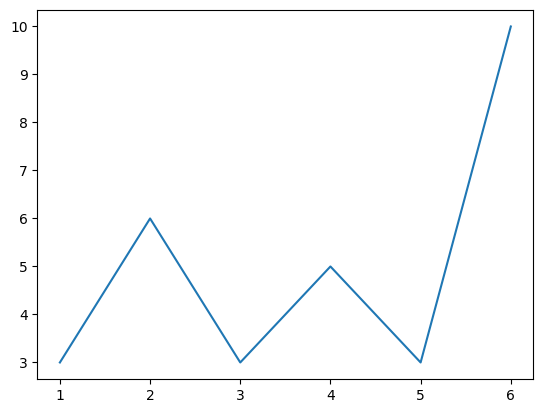

In [44]:
# 1. 创建画布
plt.figure()

# 2. 图像绘制
x = [1, 2, 3, 4, 5, 6]
y = [3, 6, 3, 5, 3, 10]
plt.plot(x, y)

# 3. 图像显示
plt.show()

In [45]:
# JN内看参数（别加括号
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure, or activate an existing figure.
    
    Parameters
    ----------
    num : int or str or `.Figure` or `.SubFigure`, optional
        A unique identifier for the figure.
    
        If a figure with that identifier already exists, this figure is made
        active and returned. An integer refers to the ``Figure.number``
        attribute, a string refers to the figure label.
    
        If there is no figure with the identifier or *num* is not given, a new
        figure is created, made active and returned.  If *num* is an int, it
        will be used for the ``Figure.number`` attribute, otherwise, an
        auto-generated integer value is used (starting at 1 and incremented
        for each new figure). If *num* is a string, the figure label a

### 设置画布大小与dpi
- plt.figure(figsize=(20, 8), dpi=80)
    - figsize: 图像多大
    - dpi: 像素点多清晰

### 图像保存
- plt.savefig()
- 注意：图像保存一定要放到show前面

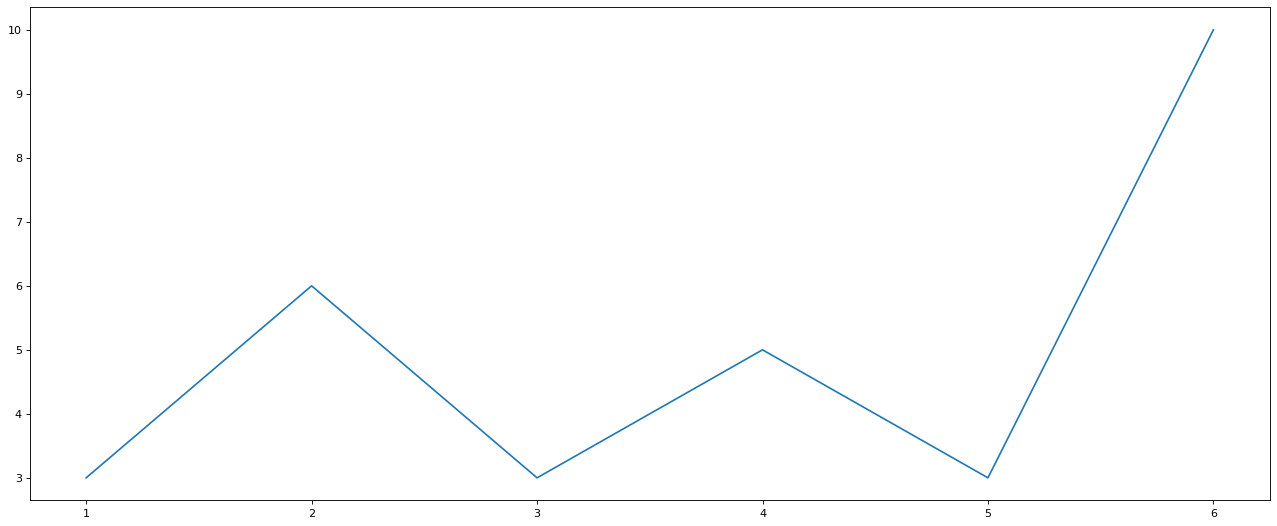

In [46]:
# 1. 创建画布并设置大小与dpi
plt.figure(figsize=(20, 8), dpi=80)

# 2. 图像绘制
x = [1, 2, 3, 4, 5, 6]
y = [3, 6, 3, 5, 3, 10]
plt.plot(x, y)

# 2.1. 图像保存 (若放在图像显示后面则会在文件夹内生成空白图片, 因为show会释放内存资源)
plt.savefig("./doc/test.png")  #当前路径下的doc文件夹内

# 3. 图像显示
plt.show()

## 案例：显示温度变化状况

### 添加x轴，y轴刻度
- plt.xticks()
- plt.yticks()
- 注意，第一个参数必须是数字，若不是数字，需要进行值的替换

### 添加网格
- plt.grid(True, linestyle="--", alpha=1)
    - linestyle: 绘制网格的方式
    - alpha: 网格的透明度

### 添加描述
- plt.xlabel("Time")
- plt.ylabel("Temperature")
- plt.title("Temperature Change Plot Graph", fontsize=20)

### 一个figure多次plot
- 直接进行绘制

### 显示图例
- plt.legend()
- 注意：需要在显示之前，声明plot里面的具体值(即，在plot中加入lable的值)
- loc参数的值默认为plt.legend(loc="best"/loc=0)
    - 0 "best"
    - 1 "upper right"
    - 2 "upper left"
    - 3 "lower left"
    - 4 "lower right"
    - 5 "right"
    - 6 "center left"
    - 7 "center right"
    - 8 "lower center"
    - 9 "upper center"
    - 10 "center"

### 设置图形风格(在plt.plot()中)
- 颜色字符(color="")
    - r: red
    - g: green
    - b: blue
    - w: white
    - c: cyan
    - m: magenta
    - y: yellow
    - k: dark
- 风格字符(linestyle="")
    - "-" 实线
    - "--" 虚线
    - "-." 点划线
    - ":" 点虚线
    - "" 留空，空格

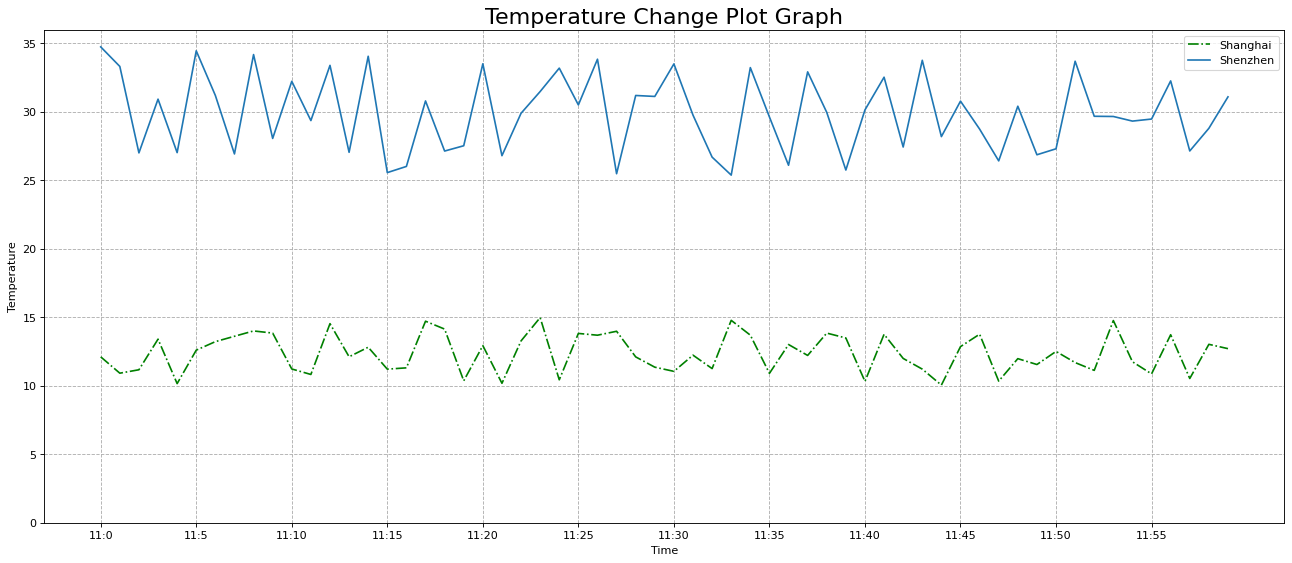

In [47]:
# 0. 生成数据
x = range(60)
y_Shanghai = [random.uniform(10, 15) for i in x]
y_Shenzhen = [random.uniform(25, 35) for k in x]

# 1. 创建画布
plt.figure(figsize=(20, 8), dpi=80)

# 2. 图形绘制
plt.plot(x, y_Shanghai, label="Shanghai", color="g", linestyle="-.")
plt.plot(x, y_Shenzhen, label="Shenzhen")

# 2.1 添加x, y轴刻度
y_ticks = range(40)
x_ticks_labels = ["11:{}".format(i) for i in x]

plt.yticks(y_ticks[::5])
plt.xticks(x[::5], x_ticks_labels[::5])
# plt.xticks(x_ticks_labels[::5])  # 必须最开始传递进去的是数字

# 2.2 添加网格
plt.grid(True, linestyle="--", alpha=1)

# 2.3 添加描述
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature Change Plot Graph", fontsize=20)

# 2.4 显示图例
plt.legend(loc=0)

# 3. 图形展示
plt.show()

### 多个坐标系显示图像
- fig, axes = plt.subplots()
    - ncols -- 几列
    - nrows -- 几行
    - 注意，有些方法需要添加set_*

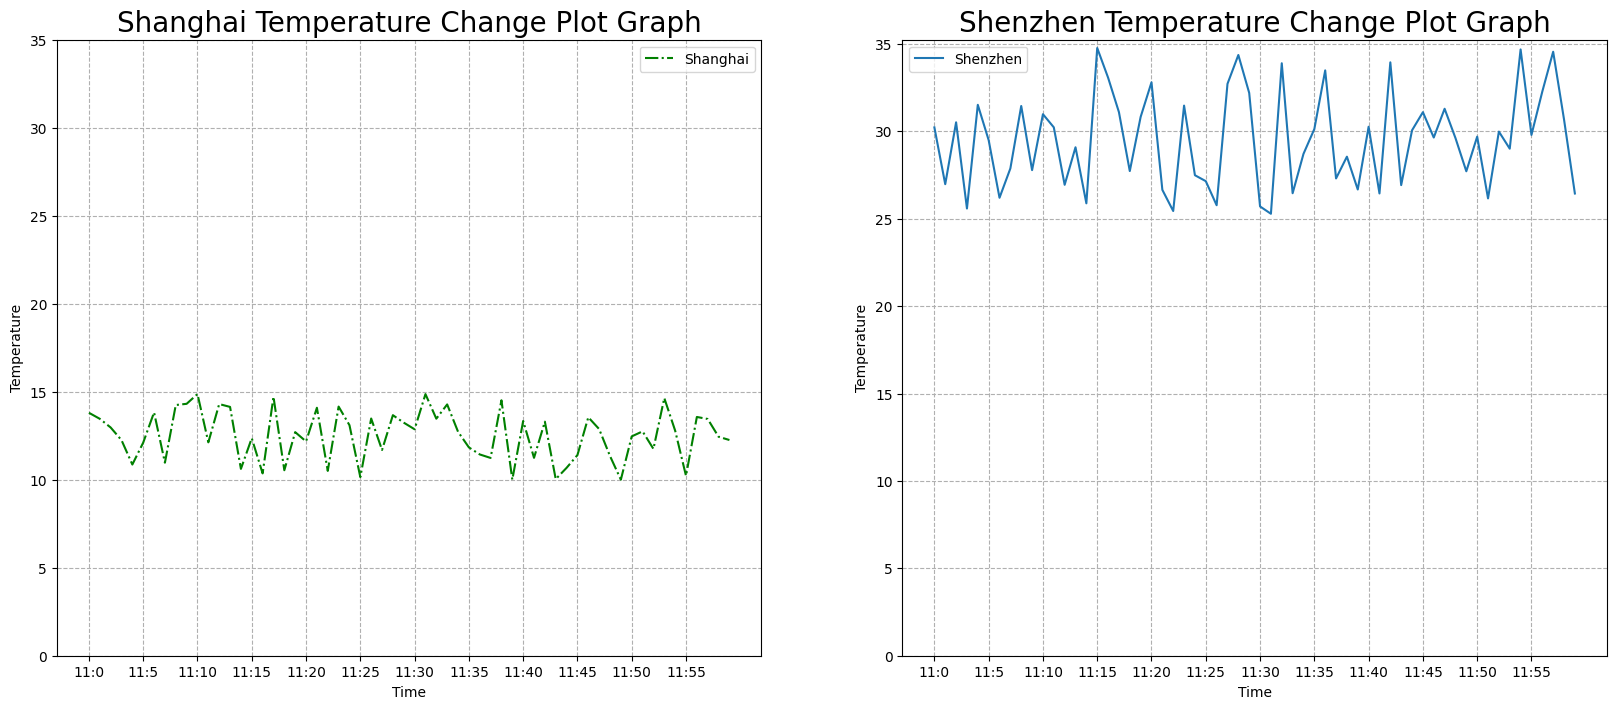

In [48]:
# 0. 生成数据
x = range(60)
y_Shanghai = [random.uniform(10, 15) for i in x]
y_Shenzhen = [random.uniform(25, 35) for k in x]

# 1. 创建画布
# plt.figure(figsize=(20, 8), dpi=80)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20 ,8), dpi=100)

# 2. 图形绘制
# plt.plot(x, y_Shanghai, label="Shanghai", color="g", linestyle="-.")
# plt.plot(x, y_Shenzhen, label="Shenzhen")
axes[0].plot(x, y_Shanghai, label="Shanghai", color="g", linestyle="-.")
axes[1].plot(x, y_Shenzhen, label="Shenzhen")

# # 2.1 添加x, y轴刻度
y_ticks = range(40)
x_ticks_labels = ["11:{}".format(i) for i in x]

# plt.yticks(y_ticks[::5])
# plt.xticks(x[::5], x_ticks_labels[::5])
# # plt.xticks(x_ticks_labels[::5])  # 必须最开始传递进去的是数字
axes[0].set_yticks(y_ticks[::5])
axes[0].set_xticks(x[::5])
axes[0].set_xticklabels(x_ticks_labels[::5])  #需要把之前的一步分成两步进行置换
axes[1].set_yticks(y_ticks[::5])
axes[1].set_xticks(x[::5])
axes[1].set_xticklabels(x_ticks_labels[::5])

# # 2.2 添加网格
# plt.grid(True, linestyle="--", alpha=1)
axes[0].grid(True, linestyle="--", alpha=1)
axes[1].grid(True, linestyle="--", alpha=1)

# # 2.3 添加描述
# plt.xlabel("Time")
# plt.ylabel("Temperature")
# plt.title("Temperature Change Plot Graph", fontsize=20)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Temperature")
axes[0].set_title("Shanghai Temperature Change Plot Graph", fontsize=20)
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Temperature")
axes[1].set_title("Shenzhen Temperature Change Plot Graph", fontsize=20)

# 2.4 显示图例
# plt.legend(loc=0)
axes[0].legend(loc=0)
axes[1].legend(loc=0)

# 3. 图形展示
plt.show()

### 折线图应用场景
- 描述数据变化
- 画函数图像

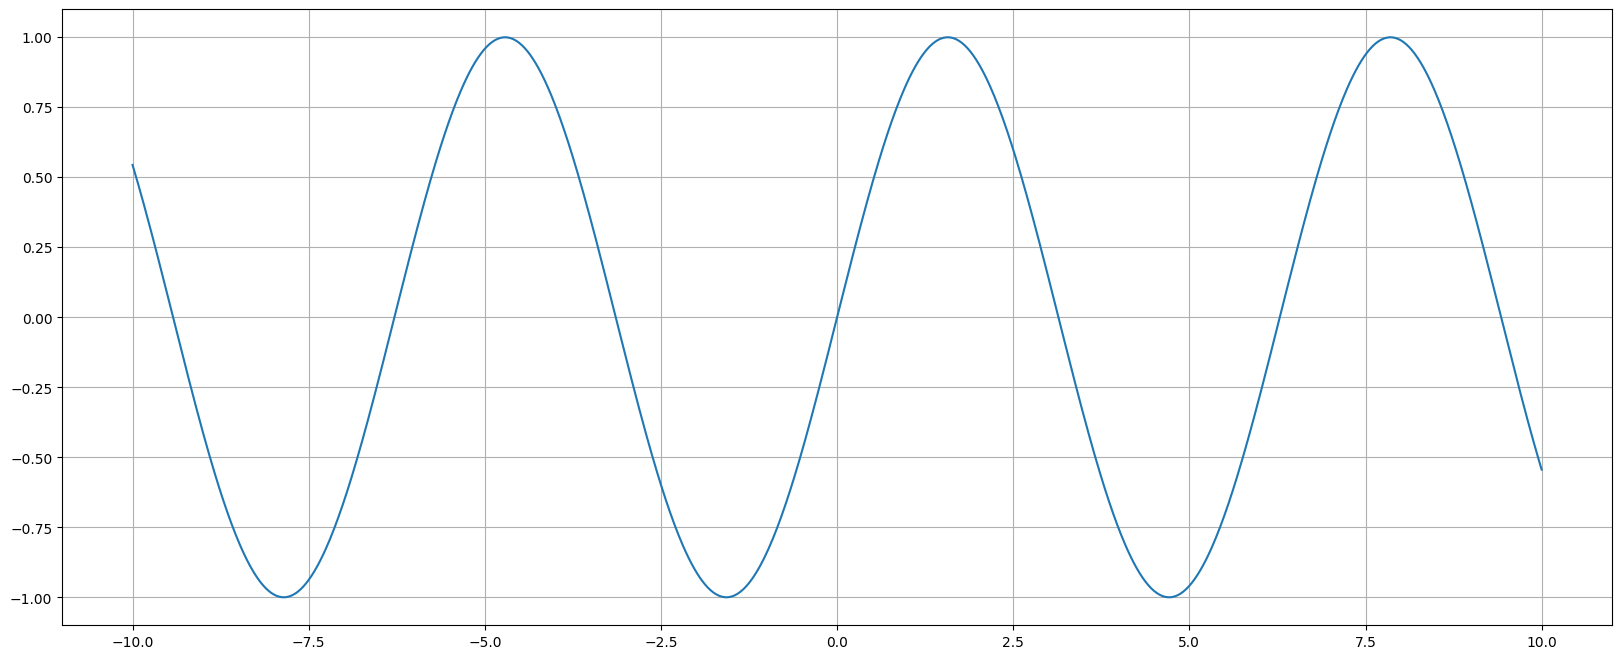

In [49]:
import numpy as np

# 0. 准备数据
x = np.linspace(-10, 10, 1000)
y = np.sin(x)

# 1. 创建画布
plt.figure(figsize=(20, 8), dpi=100)

# 2. 绘制函数图像
plt.plot(x, y)

# 2.1 增加网格显示
plt.grid()

# 3. 显示图像
plt.show()